In [5]:
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt 
%matplotlib  inline 
import numpy as np



In [7]:
(x_train , y_train) , (x_test , y_test) = keras.datasets.mnist.load_data() # it is used to load data 



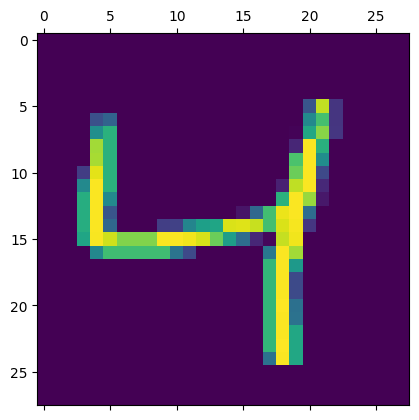

In [ ]:
plt.matshow(x_train[2])

In [8]:
x_train = x_train /255
x_test = x_test /255


x_train.shape 
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

x_train_flattened.shape 




(60000, 784)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,) , activation='sigmoid' )
    
])

model.compile(
    optimizer = 'adam' ,
    loss = 'sparse_categorical_crossentropy' ,
    metrics = ['accuracy']
)


model.fit(x_train_flattened , y_train , epochs =5)


Epoch 1/5


C:\Users\arham\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step - accuracy: 0.8228 - loss: 0.7009
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 499us/step - accuracy: 0.9141 - loss: 0.3121
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - accuracy: 0.9215 - loss: 0.2803
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 475us/step - accuracy: 0.9234 - loss: 0.2749
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - accuracy: 0.9250 - loss: 0.2691


In [ ]:
model.evaluate(x_test_flattened , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9703 - loss: 0.0949


[0.08507239073514938, 0.973800003528595]

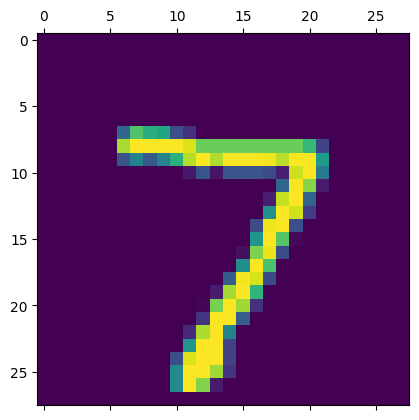

In [ ]:
plt.matshow(x_test[0])

In [ ]:
y_pred = model.predict(x_test_flattened)
y_pred[0]
print(y_pred[0])
np.argmax(y_pred[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
[2.0174809e-02 3.2531278e-07 4.3748111e-02 9.5823187e-01 2.2052671e-03
 9.6746616e-02 1.2774683e-06 9.9981725e-01 9.7748630e-02 7.2742403e-01]


7

In [ ]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test , predictions=y_pred_labels)


Text(95.72222222222221, 0.5, 'Truth')

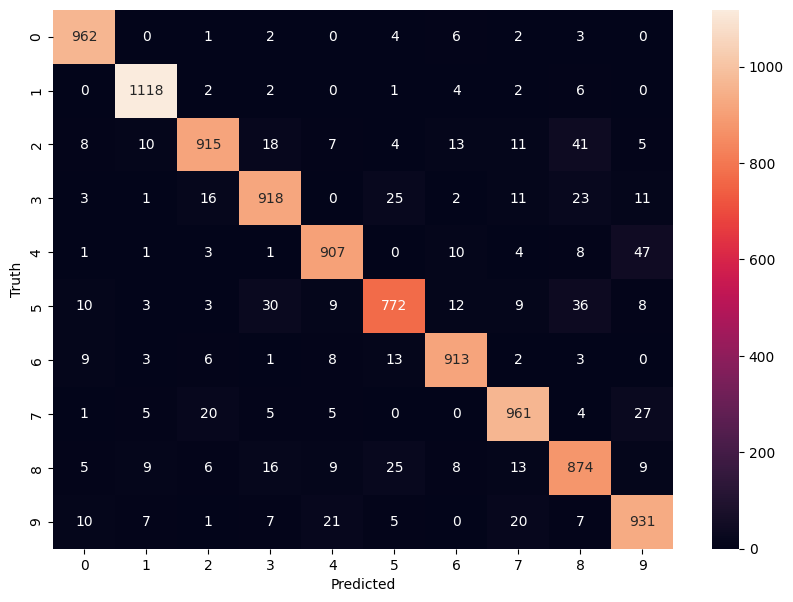

In [ ]:
import seaborn as sn 
plt.figure(figsize=(10,7))
sn.heatmap(cm , annot =True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Now with a hidden layer 

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,) , activation='relu' ),
    keras.layers.Dense(10,activation='sigmoid')
    
])

model.compile(
    optimizer = 'adam' ,
    loss = 'sparse_categorical_crossentropy' ,
    metrics = ['accuracy']
)


model.fit(x_train_flattened , y_train , epochs =5)


C:\Users\arham\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8734 - loss: 0.4588
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9606 - loss: 0.1326
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9735 - loss: 0.0907
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9808 - loss: 0.0648
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9848 - loss: 0.0506


In [ ]:
model.evaluate(x_test_flattened , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9725 - loss: 0.0917


[0.07704569399356842, 0.977400004863739]

Text(95.72222222222221, 0.5, 'Truth')

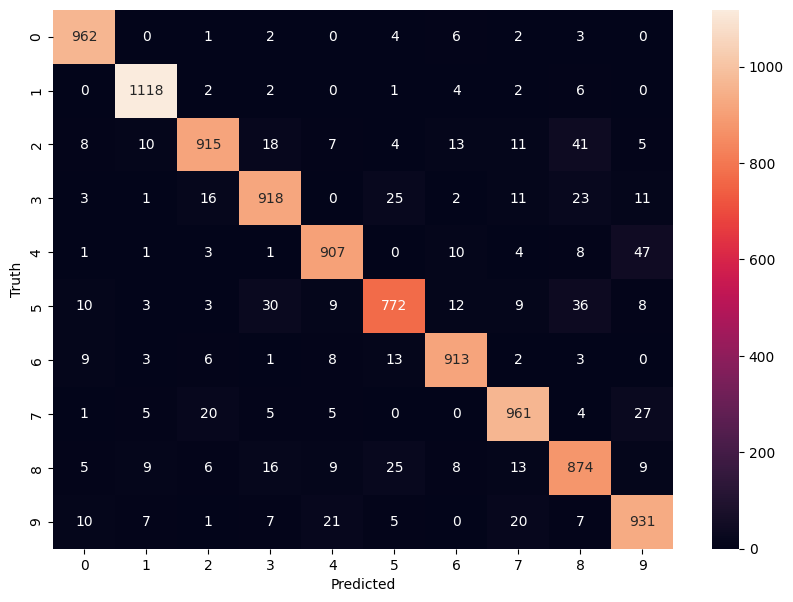

In [ ]:
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test , predictions=y_pred_labels)
import seaborn as sn 
plt.figure(figsize=(10,7))
sn.heatmap(cm , annot =True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#another way to do it 
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)) ,
    keras.layers.Dense(100,input_shape=(784,) , activation='relu' ),
    keras.layers.Dense(10,activation='sigmoid')
    
])

model.compile(
    optimizer = 'adam' ,
    loss = 'sparse_categorical_crossentropy' ,
    metrics = ['accuracy']
)


model.fit(x_train, y_train , epochs =5)


C:\Users\arham\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\arham\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8784 - loss: 0.4411
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9609 - loss: 0.1345
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9729 - loss: 0.0911
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9801 - loss: 0.0663
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9850 - loss: 0.0506


CNN

In [12]:
from tensorflow.keras import datasets , layers ,models

cnn =  models.Sequential([
    layers.Conv2D(filters=32 , kernel_size=(3,3),activation='relu' , input_shape = (28,28,1)) ,
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64 , kernel_size=(3,3),activation='relu') ,
    layers.MaxPooling2D((2,2)),




    layers.Flatten(),
    layers.Dense(64,activation = 'relu') ,
    layers.Dense(10,activation = 'softmax')     
])
cnn.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics= ['accuracy']
            )
cnn.fit(x_train,y_train,epochs = 10)





Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9097 - loss: 0.3049
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9857 - loss: 0.0454
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9909 - loss: 0.0285
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9924 - loss: 0.0215
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9953 - loss: 0.0151
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9951 - loss: 0.0136
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9972 - loss: 0.0084
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.9975 - loss: 0.0078
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9974 - loss: 0.0079
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9981 - loss: 0.0051


In [13]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9890 - loss: 0.0553


[0.0398356132209301, 0.9915000200271606]